# Summary

## Reading data: the `read_csv()` function

This is the basic use of the `read_csv()` function:

In [1]:
import pandas
data = pandas.read_csv('cars.txt', sep = ' ')
print(data.head())

    make    model     type  min_price  mid_price  max_price  mpg_city  \
0  Acura  Integra    Small       12.9       15.9       18.8        25   
1  Acura   Legend  Midsize       29.2       33.9       38.7        18   
2   Audi       90  Compact       25.9       29.1       32.3        20   
3   Audi      100  Midsize       30.8       37.7       44.6        19   
4    BMW     535i  Midsize       23.7       30.0       36.2        22   

   mpg_hgw  airbag  drive  ...  tank  passengers  length  wheelbase  width  \
0       31       0      1  ...  13.2           5     177        102     68   
1       25       2      1  ...  18.0           5     195        115     71   
2       26       1      1  ...  16.9           5     180        102     67   
3       26       2      1  ...  21.1           6     193        106     70   
4       30       1      0  ...  21.1           4     186        109     69   

   uturn  rearseat  luggage  weight  domestic  
0     37      26.5       11    2705         

The `read_csv()` can take **many** arguments to specify the format of the file you want to read in. The most important ones are the following:

* `sep`: Delimiter to use. Example: `sep = '\t'` for tabs and `sep = " "` for spaces.
* `header`: Row number(s) to use for the variable names. Set to None if there is no header in the file: `header = None`
* `index_col`: Column to use as the row labels of the DataFrame. Some data files come with a column that can be used as the index. Example: `index_col = 0`
* `na_values`: The value of missing data. For example, `na_values = 999`

## Adding  new columns

In [2]:
data['economic'] = data['mpg_city'] > 30
data['gallons_per_mile'] = 1/data['mpg_city']

**Hint**: The `numpy` module provides many different functions that allow you to perform mathematical operations on columns.

In [3]:
import numpy
data['rounded'] = numpy.round(data['gallons_per_mile'])

## Selecting data: the `query()` function

In [4]:
# all cars taking more than 4 passengers
selection = data.query('passengers > 4')

# all audis
selection = data.query('make == "Audi"')

# all compact audis
selection = data.query('make == "Audi" and type == "Compact"')

# all makes in the given list
selection = data.query('make in ["Audi", "BMW", "Ford"]')

## Getting summary statistics: the `groupby()` function

In [5]:
# Step 1: Grouping
grp = data.groupby(['make', 'type'])
# Step 2: Get the statistics
mns = grp.mean()
# Step 3: Reset the index
mns = mns.reset_index()

You can get many different statistics. Here are some examples:

In [6]:
# Standard deviation
stds = grp.std()
# Median
med = grp.median()
# Percentile
pct = grp.quantile(0.75)
# Standard error of the mean
pct = grp.sem()

## Plotting: the `plot()` function

The `plot()` function is part of the `matplotlib.pyplot`.

In [7]:
from matplotlib import pyplot

The `plot()` function is the simplest function to create graphs. It can take many different arguments.

Text(0, 0.5, 'MPG on the highway')

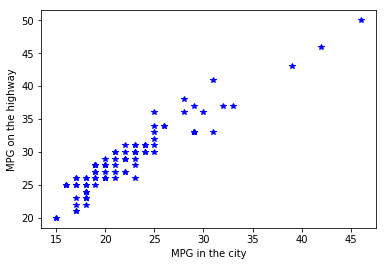

In [8]:
pyplot.plot(data['mpg_city'], data['mpg_hgw'], linestyle='none', marker='*', color='blue')
# Adding axis labels
pyplot.xlabel('MPG in the city')
pyplot.ylabel('MPG on the highway')

Per default, the `plot()` function keeps plotting on the same graph until you start a new figure or close the current one. We can exploit this to plot multiple series of points on a single graph.

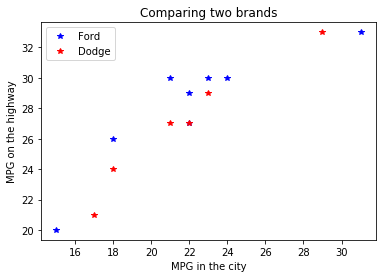

In [9]:
ford = data.query('make == "Ford"')
dodge = data.query('make == "Dodge"')

pyplot.plot(ford['mpg_city'], ford['mpg_hgw'], linestyle='none', marker='*', color='blue')
pyplot.plot(dodge['mpg_city'], dodge['mpg_hgw'], linestyle='none', marker='*', color='red')
# Adding axis labels
pyplot.xlabel('MPG in the city')
pyplot.ylabel('MPG on the highway')
pyplot.title('Comparing two brands')

pyplot.legend(['Ford', 'Dodge'])

## Scatterplots: the `scatter()` function

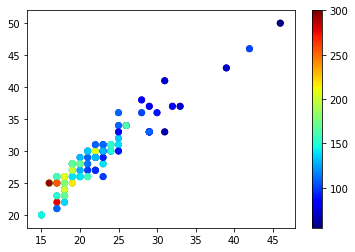

In [15]:
data.columns
pyplot.scatter(data['mpg_city'], data['mpg_hgw'], c = data['horsepower'])
pyplot.set_cmap('jet')
pyplot.colorbar()

## Seaborn

In [21]:
import seaborn

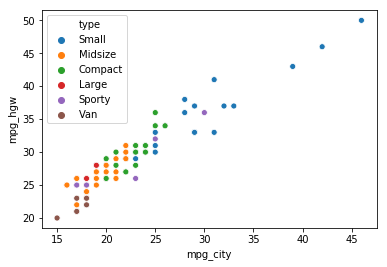

In [24]:
seaborn.scatterplot(x='mpg_city', y='mpg_hgw', hue='type', data = data)

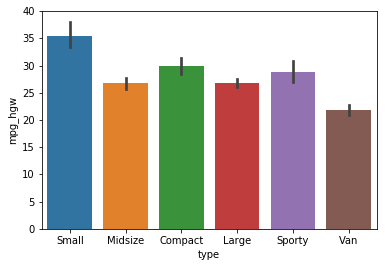

In [25]:
seaborn.barplot(x='type', y='mpg_hgw', data = data)

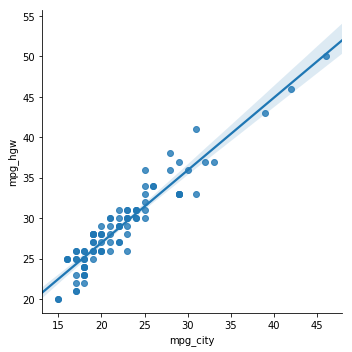

In [26]:
seaborn.lmplot(x='mpg_city', y='mpg_hgw', data = data)

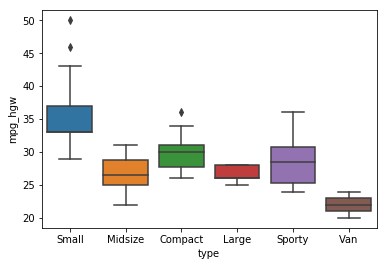

In [27]:
seaborn.boxplot(x='type', y='mpg_hgw', data = data)